# Problem Statement: IRIS FLOWER CLASSIFICATION
The Iris flower dataset encompasses three distinct types: setosa, 
versicolor, and virginica. These types can b discerned by their measurement . Now, envision having measurements of Iris flower classified by their corresponding types. Your goal is to educatea machine learning model that can acq ire knowledge from thse measurements and precisely categorize the Iris flowers into teir respective types

# Importing libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
import seaborn as sns

In [51]:
from sklearn.preprocessing import StandardScaler

In [53]:
from sklearn.model_selection import train_test_split

In [70]:
from sklearn.linear_model import LogisticRegression

In [76]:
from sklearn.metrics import confusion_matrix , accuracy_score 

# Importing Dataset

In [15]:
df = pd.read_csv('C:\\Users\\shankar\\Downloads\\IRIS.csv')

# Exploratory Data Analysis (EDA)

In [16]:
df.shape

(150, 5)

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [19]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
x = df.drop(columns=['species'])

In [26]:
y = df['species']

In [30]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


# Pair Plot

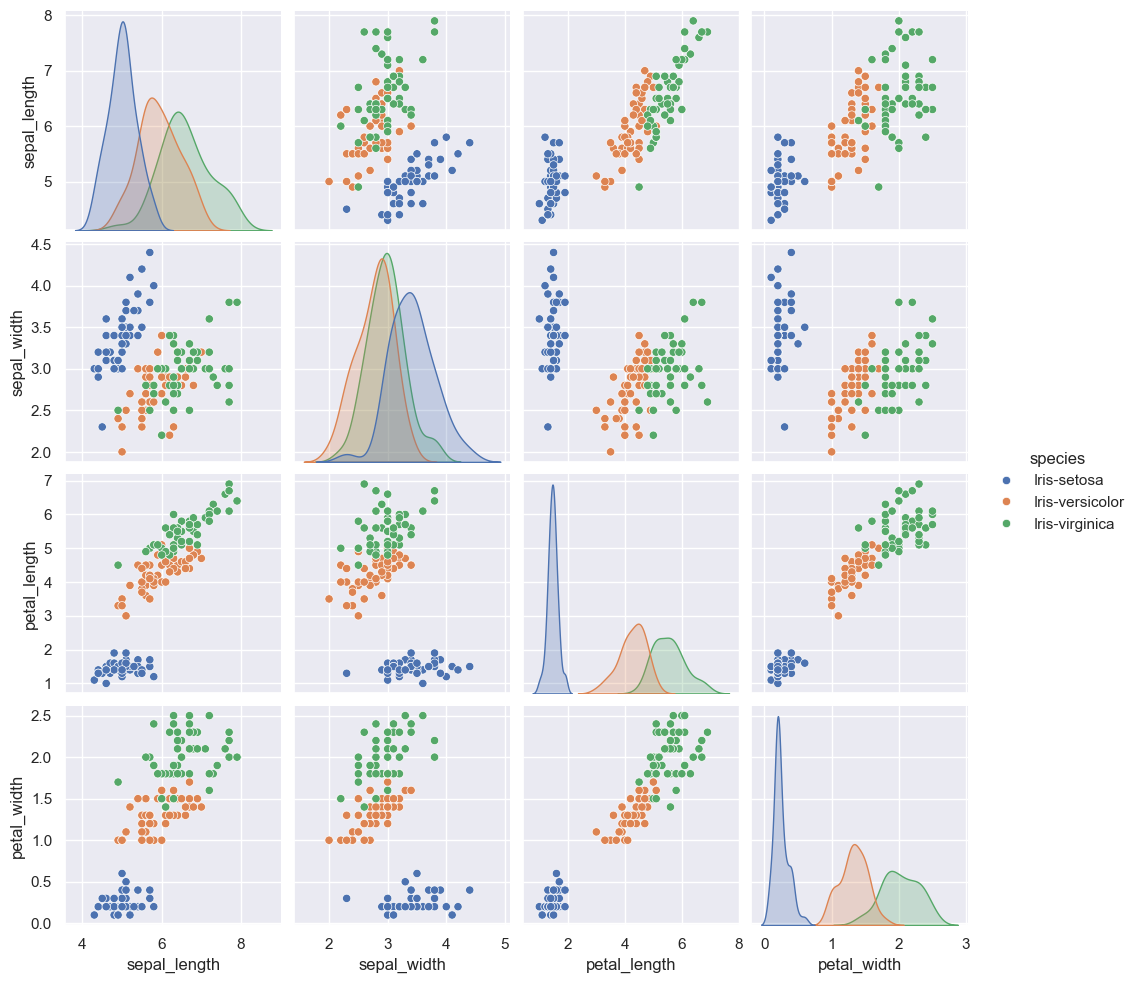

In [35]:
sns.set( style = 'darkgrid' )
sns.pairplot(df, hue = 'species')

# Heat Map

<Axes: >

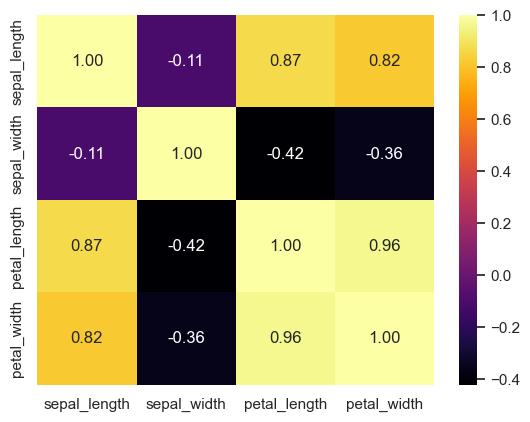

In [42]:
#correlation Heatmap: -Visualize correlation between features
corr_matrix =x.corr()
sns.heatmap(corr_matrix,annot=True,cmap='inferno',fmt='.2f')

# Box Plot

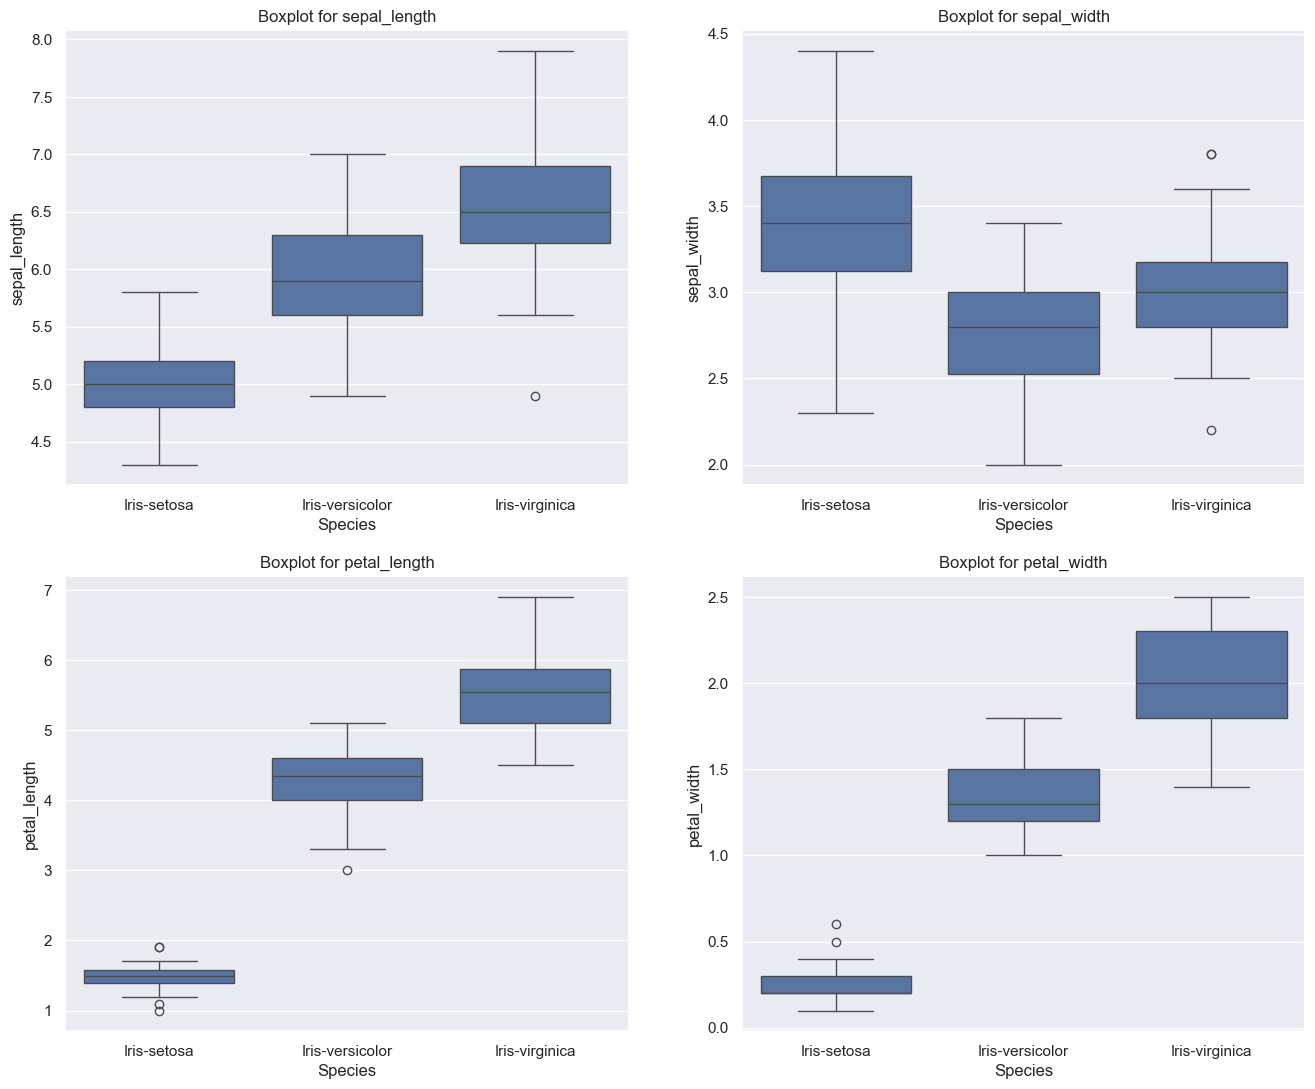

In [45]:
#Boxplots: Visualizes distribution of data and highlights outliers
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,13))
axes=axes.flatten()
for i,col in enumerate(x.columns):
    sns.boxplot(x='species',y=col,data=df,ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(col)

# Violin Plot

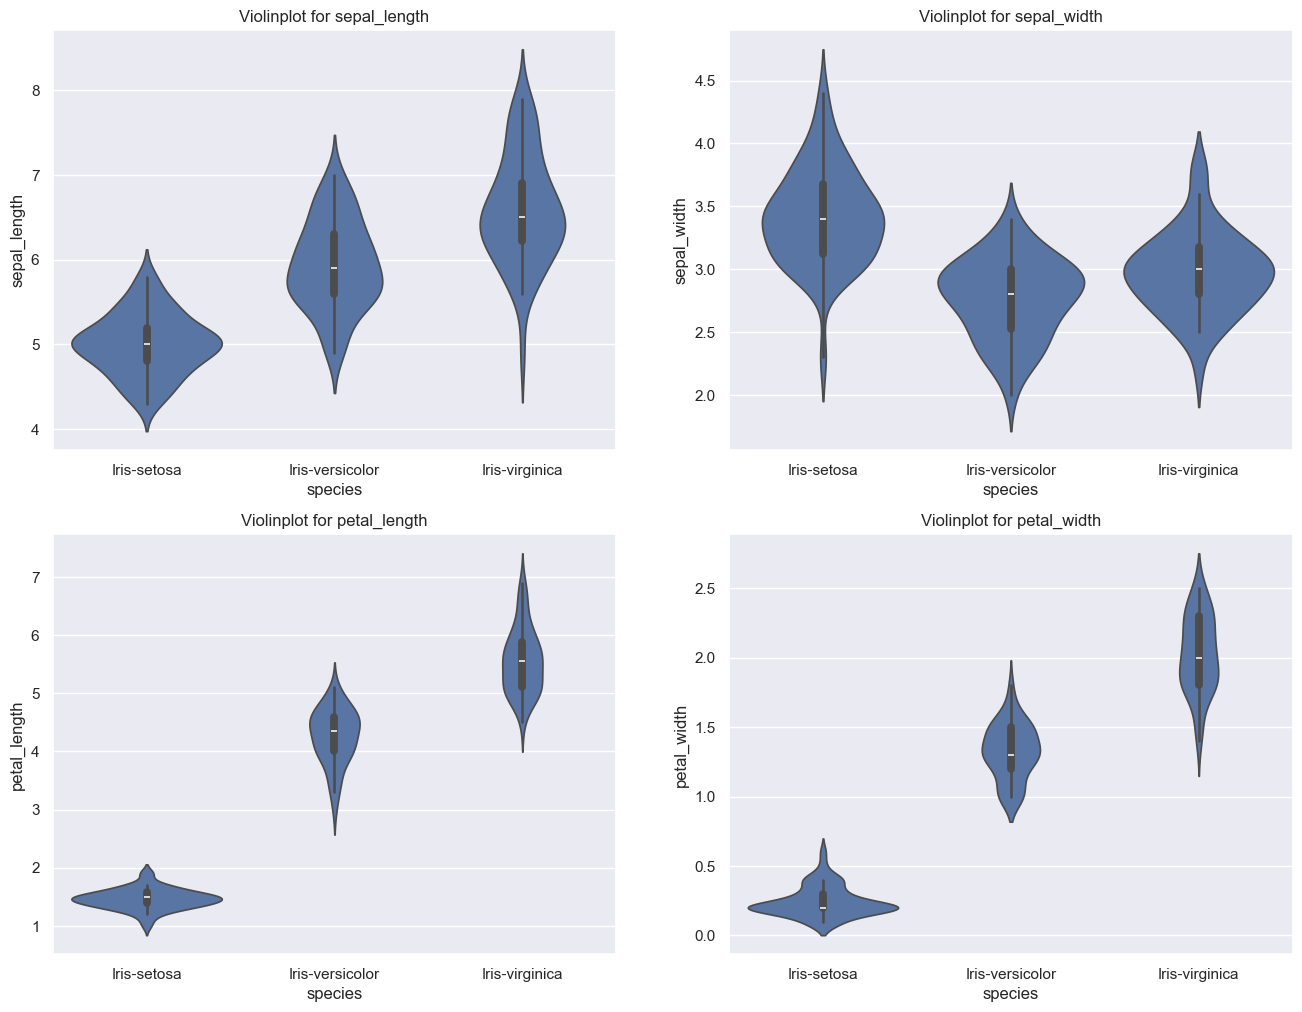

In [47]:
#Violin Plot: Similar to box plot with a deeper visualization
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,12))
axes=axes.flatten()
for i,col in enumerate(x.columns):
    sns.violinplot(x='species',y=col,data=df,ax=axes[i])
    axes[i].set_title(f'Violinplot for {col}')

In [56]:
x=df.drop(columns=['species'])
y=df['species']
print(x.shape)
print(y.shape)

(150, 4)
(150,)


# Train - Test - Split

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [65]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# Normalization

In [66]:
#Standard Scaler - helps in gradient descent, makes easy to interpret model coefficients
scaler = StandardScaler()

In [72]:
scaled_train = scaler.fit_transform(x_train)
scaled_test=scaler.fit_transform(x_test)

# Models
   Logistic Regression

In [73]:
#Logistic Regression
#train model
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(scaled_train,y_train)
logistic_regression_predictions = logistic_regression_model.predict(scaled_test)

In [77]:
accu = accuracy_score (logistic_regression_predictions , y_test )

In [79]:
accu*100

95.55555555555556

In [80]:
confu=confusion_matrix( logistic_regression_predictions , y_test)

In [81]:
confu

array([[14,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 14]], dtype=int64)